In [1]:
MATCH_TO_EXAMINE = '2021-wimbledon-1502'

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
sns.set_context('notebook')
plt.style.use('ggplot')

In [4]:
def prob_hold_to_love(p):
    """Probability server holds at love."""
    return p**4

In [5]:
def prob_hold_to_15(p):
    """Probability server holds to 15."""
    q = 1-p
    return 4*(p**4)*q

In [6]:
def prob_hold_to_30(p):
    """Probability server holds to 30."""
    q = 1-p
    return 10*(p**4)*(q**2)

In [7]:
def prob_get_to_deuce(p):
    """Probability game gets to deuce at least once."""
    q = 1-p
    return 20*(p**3)*(q**3)

In [8]:
def prob_hold_via_deuce(p):
    """Probability server holds from deuce."""
    q = 1-p
    d = (p**2) / (1 - 2*p*q)
    return d*prob_get_to_deuce(p)

In [9]:
def prob_hold(p):
    """Probability server holds."""
    return (
        prob_hold_to_love(p) +
        prob_hold_to_15(p) + 
        prob_hold_to_30(p) + 
        prob_hold_via_deuce(p)
    )

In [10]:
# working on probability of winning a series of games
def prob_six_zero(ps):
    """Probability server wins 6-0."""
    return ps**6

In [11]:
def prob_six_one(ps):
    """Probability server wins 6-1."""
    qs = 1-ps
    return 6*(ps**6)*qs

In [12]:
def prob_six_two(ps):
    """Probability server wins 6-2."""
    qs = 1-ps
    return 21*(ps**6)*(qs**2)

In [13]:
def prob_six_three(ps):
    """Probability server wins 6-3."""
    qs = 1-ps
    return 56*(ps**6)*(qs**3)

In [14]:
def prob_six_four(ps):
    """Probability server wins 6-4."""
    qs = 1-ps
    return 126*(ps**6)*(qs**4)

In [15]:
def prob_seven_five(ps):
    """Probability server wins 7-5."""
    qs = 1-ps
    return 42*(ps**7)*(qs**5)

In [16]:
def prob_tiebreaker(ps):
    """Probability server wins 7-6."""
    qs = 1-ps
    return 924*(ps**7)*(qs**6)

In [17]:
def prob_win_set(ps):
    """Probability server holds."""
    return (
        prob_six_zero(ps) +
        prob_six_one(ps) + 
        prob_six_two(ps) + 
        prob_six_three(ps) +
        prob_six_four(ps) +
        prob_seven_five(ps) +
        prob_tiebreaker(ps)
    )

In [18]:
# Calculate the probability of winning a match
def prob_three_zero(pm):
    """Probability player1 wins 3-0."""
    qm = 1-pm
    return pm**3

In [19]:
def prob_three_one(pm):
    """Probability player1 wins 3-1."""
    qm = 1-pm
    return 3*(pm**3)*qm

In [20]:
def prob_three_two(pm):
    """Probability player1 wins 3-2."""
    qm = 1-pm
    return 6*(pm**3)*(qm**2)

In [21]:
def prob_win_match(pm):
    """Probability server holds."""
    return (
        prob_three_zero(pm) +
        prob_three_one(pm) + 
        prob_three_two(pm) 
    )

In [22]:
# 1 - Calculate serve probability (points_on_serves / total serves)
# 2 - Calculate probability of winning a game from serve probability for each player
# 3 - Calculate probability of winning a set from the player win game probability
# 4 - Calculate probability of winning a match from the player win set probability
# 5 - Graph the probability of winning the set as point values increase

In [23]:
def getServeProbability(match_data, player):
    serve_no = match_data['server'].values
    point_victor = match_data['point_victor'].values

    serve_point_won = 0
    num_serves = 0

    p_array = []

    for index in range(len(serve_no)):
        if player == serve_no[index]:
            num_serves += 1

            if player == point_victor[index]:
                serve_point_won += 1

        if num_serves == 0:
            p_array.append(0)
        else:
            p_array.append(serve_point_won / num_serves)

    return p_array

In [24]:
def prob_win_independent_game(p1, p2):
    p1_holds_game = prob_hold(p1)
    p1_concedes_game = (1 - p1_holds_game)

    p2_holds_game = prob_hold(p2)
    p2_concedes_game = (1 - p2_holds_game)

    ps1 = (p1_holds_game + p2_concedes_game) / 2 # Prob p1 wins any independent game
    ps2 = (p2_holds_game + p1_concedes_game) / 2 # Prob p2 wins any independent game

    return ps1, ps2

In [25]:
wimbledon_data_raw = pd.read_csv('2021-wimbledon-data.csv')

alcaraz_match = wimbledon_data_raw[wimbledon_data_raw['match_id'] == MATCH_TO_EXAMINE]

player1_name = alcaraz_match['player1'].values[0]
player2_name = alcaraz_match['player2'].values[0]

In [26]:
# 1 - Get serve probabilities

p1_probability = getServeProbability(alcaraz_match, 1)
p2_probability = getServeProbability(alcaraz_match, 2)

print("Probability of winning a serve")
print(p1_probability)
print(p2_probability)

Probability of winning a serve
[0, 0, 1.0, 1.0, 1.0, 0.75, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8333333333333334, 0.8571428571428571, 0.875, 0.7777777777777778, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8181818181818182, 0.75, 0.7692307692307693, 0.7857142857142857, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.75, 0.7647058823529411, 0.7777777777777778, 0.7894736842105263, 0.75, 0.7619047619047619, 0.7619047619047619, 0.7619047619047619, 0.7619047619047619, 0.7619047619047619, 0.7619047619047619, 0.7727272727272727, 0.7391304347826086, 0.75, 0.76, 0.7307692307692307, 0.7037037037037037, 0.6785714285714286, 0.6551724137931034, 0.6551724137931034, 0.6551724137931034, 0.6551724137931034, 0.6551724137931034, 0.6666666666666666, 0.6451612903225806, 0.65625, 0.6666666666666666, 0.6764705882352942, 0.6764705882352942, 0.6764705882352942, 0.6764705882352942, 0.6764705882352942, 0.6764705882352942, 0.6764705882352942, 0.6764705882352942, 0.6764705882352942, 0.6857142857142857, 0.6944444444444444, 0.702

In [27]:
#  2 - Get probability of winning the game

max_length = max(len(p1_probability), len(p2_probability))

pg1_array = []
pg2_array = []

for index in range(max_length):
    pg1, pg2 = prob_win_independent_game(p1_probability[index], p2_probability[index])

    pg1_array.append(pg1)
    pg2_array.append(pg2)

print("Probability of winning the game")
print(pg1_array)
print(pg2_array)

Probability of winning the game
[0.5, 0.5, 1.0, 1.0, 1.0, 0.974609375, 0.9891105882352942, 0.9891105882352942, 0.7391105882352942, 0.5611270491406439, 0.5145012132352942, 0.5, 0.5055079619388115, 0.5079409941973796, 0.5091438062959559, 0.4946036088322516, 0.5, 0.49449203806118847, 0.49205900580262046, 0.49085619370404415, 0.49020811219518656, 0.49355588661958333, 0.47570689895989243, 0.48230703981567813, 0.4869173060104118, 0.49020811219518656, 0.5, 0.5241755889161812, 0.5611270491406439, 0.5434268768051265, 0.5306860401713717, 0.5213866892836255, 0.5465106776559785, 0.5352974733859459, 0.5266198436099585, 0.5198427483955801, 0.505341535160286, 0.5105117759567683, 0.5144463572278317, 0.5174784921159665, 0.505341535160286, 0.5095894467777504, 0.5284628038588437, 0.5204327385535419, 0.5139222872983513, 0.5086100443319233, 0.5042479116174643, 0.5076553125280675, 0.49563786728554104, 0.5, 0.5036042238554157, 0.49195361749038286, 0.47795602044010116, 0.4619763928642774, 0.4444362924348011, 

In [28]:
# 3 - Get probability of winning the set.

ps1_array = []
ps2_array = []

for index in range(max_length):
    ps1_array.append(prob_win_set(pg1_array[index]))
    ps2_array.append(prob_win_set(pg2_array[index]))

print("Probability of winning the set")

print(ps1_array)
print(ps2_array)

Probability of winning the set
[0.5, 0.5, 1.0, 1.0, 1.0, 0.9999981870443743, 0.9999999705163597, 0.9999999705163597, 0.9497270854069207, 0.6609741410758763, 0.5394077727800648, 0.5, 0.5150075113392599, 0.5216238493880728, 0.5248910598590194, 0.4852722368757252, 0.5, 0.4849676174077563, 0.478324487413346, 0.47504046908553355, 0.4732711586165681, 0.48241159018954705, 0.43377704383491433, 0.45172120341354316, 0.4642897880471718, 0.4732711586165681, 0.5, 0.5654302811198821, 0.6609741410758763, 0.616134783048456, 0.582761913399577, 0.5579582462055492, 0.6240856356081791, 0.5949313362869949, 0.5719563742241163, 0.5538107274239967, 0.5145545999128003, 0.5286035858600064, 0.5392594628652968, 0.5474455357582659, 0.5145545999128003, 0.5261008802898617, 0.5768620883201349, 0.5553965154310366, 0.5378422035667538, 0.5234415195076271, 0.5115774625775722, 0.5208474730286248, 0.48809591778547473, 0.5, 0.5098244282855536, 0.478036738258841, 0.43988362051768704, 0.39676880924940483, 0.35052226698483097,

In [29]:
# 4 - Get probability of winning the match

pm1_array = []
pm2_array = []

for index in range(max_length):
    pm1_array.append(prob_win_match(ps1_array[index]))
    pm2_array.append(prob_win_match(ps2_array[index]))

print("Probability of winning the match")

print(pm1_array)
print(pm2_array)

Probability of winning the match
[0.5, 0.5, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9988233064245693, 0.7816186948713123, 0.5735841482585915, 0.5, 0.5281221879653151, 0.5404941903979104, 0.5465936864336502, 0.4724014127595258, 0.5, 0.47183126256126007, 0.45940930398927754, 0.45327856763048635, 0.44997882010907475, 0.46704892656906616, 0.37727641264219847, 0.4100383339409758, 0.4332706959064987, 0.44997882010907475, 0.5, 0.6212883973604888, 0.7816186948713123, 0.710047756316724, 0.6523674820047219, 0.6077021810012999, 0.7232841878511965, 0.6737649284889677, 0.6330669263321046, 0.6001187507644041, 0.5272744627866071, 0.5535148260880867, 0.57330949835101, 0.5884278038737465, 0.5272744627866071, 0.5488503163252794, 0.6418620896054894, 0.6030215996616186, 0.5706836410070513, 0.5438884854048245, 0.521699984502168, 0.5390437322115508, 0.4776882788827064, 0.5, 0.5184160623453768, 0.45887182729625253, 0.3883633741361388, 0.31187168494513895, 0.23598085038055444, 0.22168465446330288, 0.21016983031849057

In [30]:
# change probability if player wins set
def modify_momentum(match_data, probability_array, player):
    # n = number of sets won
    n = 0
    x = 1.5

    for index in range(len(probability_array)):
        set_victor_array = match_data['set_victor'].values
        won_set = set_victor_array[index] == player

        if (won_set):
            n += 1

        if (n > 0):
            probability_array[index] = (((x**n)-1)/(x**n) + (1/(x**n))*probability_array[index])

        

    return probability_array


In [31]:
p1_momentum = modify_momentum(alcaraz_match,  pm1_array, 1)
p2_momentum = modify_momentum(alcaraz_match, pm2_array, 2)

print(p1_momentum)
print(p2_momentum)

print(len(p1_momentum))
print(len(p2_momentum))



[0.5, 0.5, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9988233064245693, 0.7816186948713123, 0.5735841482585915, 0.5, 0.5281221879653151, 0.5404941903979104, 0.5465936864336502, 0.4724014127595258, 0.5, 0.47183126256126007, 0.45940930398927754, 0.45327856763048635, 0.44997882010907475, 0.46704892656906616, 0.37727641264219847, 0.4100383339409758, 0.4332706959064987, 0.44997882010907475, 0.5, 0.6212883973604888, 0.7816186948713123, 0.710047756316724, 0.6523674820047219, 0.6077021810012999, 0.7232841878511965, 0.6737649284889677, 0.6330669263321046, 0.6001187507644041, 0.5272744627866071, 0.5535148260880867, 0.57330949835101, 0.5884278038737465, 0.5272744627866071, 0.5488503163252794, 0.6418620896054894, 0.6030215996616186, 0.5706836410070513, 0.5438884854048245, 0.521699984502168, 0.5390437322115508, 0.4776882788827064, 0.5, 0.5184160623453768, 0.45887182729625253, 0.3883633741361388, 0.31187168494513895, 0.23598085038055444, 0.22168465446330288, 0.21016983031849057, 0.2008061130388472, 0.193122921

In [32]:
# change probability if unforced error ocurs
def modify_momentum_err1(match_data, momentum_array):
    array = []

    # unforced error total
    n = 0
    x=1.001
    for index in range(len(momentum_array)):
        unf_err_array = match_data['p1_unf_err'].values
        unf_err = unf_err_array[index] == 1
        
        if (unf_err):
            n += 1

        if (n >= 0):
            array.append (((x**n)-1)/(x**n) + (1/(x**n))*momentum_array[index])
    print(n)
    print(x)
    return array

In [33]:
# change probability if unforced error ocurs
def modify_momentum_err2(match_data, momentum_array):
    array = []

    # unforced error total
    n = 0
    x=1.001

    for index in range(len(momentum_array)):
        unf_err_array = match_data['p2_unf_err'].values
        unf_err = unf_err_array[index] == 1

        if (unf_err):
            n += 1

        if (n >= 0):
            array.append (((x**n)-1)/(x**n) + (1/(x**n))*momentum_array[index])
    print(n)
    return array

In [34]:
p1_momentum1 = modify_momentum_err1(alcaraz_match, p1_momentum)
p2_momentum2 = modify_momentum_err2(alcaraz_match, p2_momentum)

print(len(p1_momentum1))
print(len(p2_momentum2))

50
1.001
48
295
295


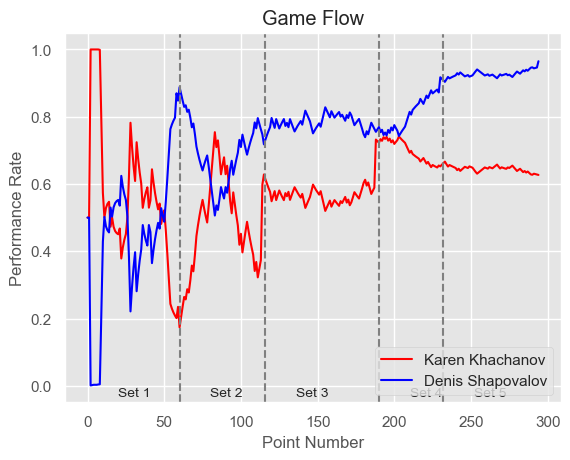

In [35]:
# graph the performance of match flow + momentum
set_change_points = []

old_entry = 1
for index, entry in enumerate(alcaraz_match['set_no']):
    if entry != old_entry:
        set_change_points.append(index + 1)
        old_entry = entry

plt.title("Game Flow")
plt.plot(range(len(p1_momentum1)), p1_momentum1, color="red", label=f"{player1_name}")
plt.plot(range(len(p2_momentum2)), p2_momentum2, color="blue", label=f"{player2_name}")
plt.xlabel("Point Number")
plt.ylabel("Performance Rate")
plt.legend()

plt.text(20, -.04, 'Set 1', verticalalignment='bottom')
for index, value in enumerate(set_change_points):
    plt.axvline(x=value, color='gray', linestyle='--')
    plt.text(value + 20, -.04, f"Set {index + 2}", verticalalignment='bottom')

plt.show()

In [36]:
# Find who was performing better before sets 3 and 5
set_change_points = []

old_entry = 1
for index, entry in enumerate(alcaraz_match['set_no']):
    if entry != old_entry:
        set_change_points.append(index + 1)
        old_entry = entry
for index, value in enumerate(set_change_points):
    if index == 1:
        if p1_momentum1[value] > p2_momentum2[value]:
            set_3_pred = player1_name
            print(player1_name, "is winning going into set 3 with: ", p1_momentum1[value], "momentum")
        else:
            set_3_pred = player2_name
            print(player2_name, "is winning going into set 3 with: ", p2_momentum2[value], "momentum")

    if index == 2:
        if p1_momentum1[value] > p2_momentum2[value]:
            set_4_pred = player1_name
            print(player1_name, "is winning going into set 4 with: ", p1_momentum1[value], "momentum")
        else:
            set_4_pred = player2_name
            print(player2_name, "is winning going into set 4 with: ", p2_momentum2[value], "momentum")

    if index == 3:
        if p1_momentum1[value] > p2_momentum2[value]:
            set_5_pred = player1_name
            print(player1_name, "is winning going into set 5 with: ", p1_momentum1[value], "momentum")
        else:
            set_5_pred = player2_name
            print(player2_name, "is winning going into set 5 with: ", p2_momentum2[value], "momentum")



set_victors = alcaraz_match['set_victor']
final_point = set_victors.iloc[-1]
if final_point == 1:
    winner = player1_name
else:
    winner = player2_name
print(winner, "won the game")

if winner == set_4_pred:
    print("set 3 prediction is correct")
else:
    print("set 3 prediction is wrong")

if winner == set_4_pred:
    print("set 4 prediction is correct")
else:
    print("set 4 prediction is wrong")

if winner == set_5_pred:
    print("set 5 prediction is correct")
else:
    print("set 5 prediction is wrong")

Denis Shapovalov is winning going into set 3 with:  0.7323244967971836 momentum
Denis Shapovalov is winning going into set 4 with:  0.769308110152721 momentum
Denis Shapovalov is winning going into set 5 with:  0.9081757348438207 momentum
Denis Shapovalov won the game
set 3 prediction is correct
set 4 prediction is correct
set 5 prediction is correct
